In [1]:
import os
import sys
import random
import time
from random import seed, randint
import argparse
import platform
from datetime import datetime
import imp
import numpy as np
import fileinput
from itertools import product
import pandas as pd
from scipy.interpolate import griddata
from scipy.interpolate import interp2d
import seaborn as sns
from os import listdir

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import griddata
import matplotlib as mpl
# sys.path.insert(0,'..')
# from notebookFunctions import *
# from .. import notebookFunctions
from Bio.PDB.Polypeptide import one_to_three
from Bio.PDB.Polypeptide import three_to_one
from Bio.PDB.PDBParser import PDBParser
from pyCodeLib import *
from small_script.myFunctions import *
from collections import defaultdict
%matplotlib inline
# plt.rcParams['figure.figsize'] = (10,6.180)    #golden ratio
# %matplotlib notebook
%load_ext autoreload
%autoreload 2

In [2]:
plt.rcParams['figure.figsize'] = np.array([16.18033, 10])    #golden ratio
plt.rcParams['figure.facecolor'] = 'w'
plt.rcParams['figure.dpi'] = 100
plt.rcParams.update({'font.size': 22})

In [3]:
pdb_list = ["T0951-D1", "T0953s2-D1", "T0955-D1", "T0957s1-D1", "T0957s1-D2", "T0958-D1", "T0960-D5", "T0963-D3", "T0968s1-D1", "T1008-D1"]


In [4]:
pdb_list = ['1r69', '3icb', '256b', '4cpv', '2mhr', '1mba', '2fha', '1fc2', '1enh', '2gb1', '2cro', '1ctf', '4icb']
pdb_list += ["1uzc", "1ccr", "1jwe", "T0172_2"]

simulationType = "compare_side_chain_with_and_without"
run_n = 10
folder_list = ["run2"]
sub_mode_list = [11, 12]
all_data = []

for folder in folder_list:
    for pdb in pdb_list:
        for i in range(run_n):
            for subMode in sub_mode_list:
                pre = f"/Users/weilu/Research/server/mar_2020/{simulationType}/{folder}/{pdb}/{subMode}_{i}"
                info_file = "info.dat"
                location = f"{pre}/{info_file}"
                try:
                    tmp = pd.read_csv(location, sep="\s+")
                    tmp = tmp.assign(Run=i, Protein=pdb, Folder=folder, subMode=subMode)
                    all_data.append(tmp)
                except:
                    print(pdb, i, folder, subMode)
                    pass
data = pd.concat(all_data)
today = datetime.today().strftime('%m-%d')
outFile = f"/Users/weilu/Research/data/openMM/{simulationType}_{folder}_{subMode}_{today}.csv"
data.reset_index(drop=True).to_csv(outFile)
print(outFile)

/Users/weilu/Research/data/openMM/compare_side_chain_with_and_without_run2_12_03-02.csv


In [19]:

data = pd.read_csv("/Users/weilu/Research/data/openMM/compare_side_chain_with_and_without_run2_12_03-02.csv", index_col=0)

scheme_dic = {"2":"new_cb_without_frag", "3":"old_cb_without_frag", 
             "4":"new_cb_with_ca_frag", "5":"old_cb_with_ca_frag", "6":"old_cb_my_gamma",
             "11":"cbd_exclude_k1", "12":"cbd_exclude_k10"}
data["scheme"] = data["subMode"].astype(str).apply(lambda x: scheme_dic[x])

In [20]:
data_new = data

In [15]:

data = pd.read_csv("/Users/weilu/Research/data/openMM/compare_side_chain_with_and_without_side_chain_run1_7_02-25.csv", index_col=0)

scheme_dic = {"2":"new_cb_without_frag", "3":"old_cb_without_frag", 
             "4":"new_cb_with_ca_frag", "5":"old_cb_with_ca_frag", "6":"old_cb_my_gamma",
            "7":"new_cb_new_gamma"}
data["scheme"] = data["subMode"].astype(str).apply(lambda x: scheme_dic[x])

/Users/weilu/anaconda3/envs/py36/lib/python3.6/site-packages/numpy/lib/arraysetops.py:522: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [16]:
data_old = data

In [21]:
data = pd.concat([data_new, data_old])

Text(0.5, 1.0, 'With Frag memory')

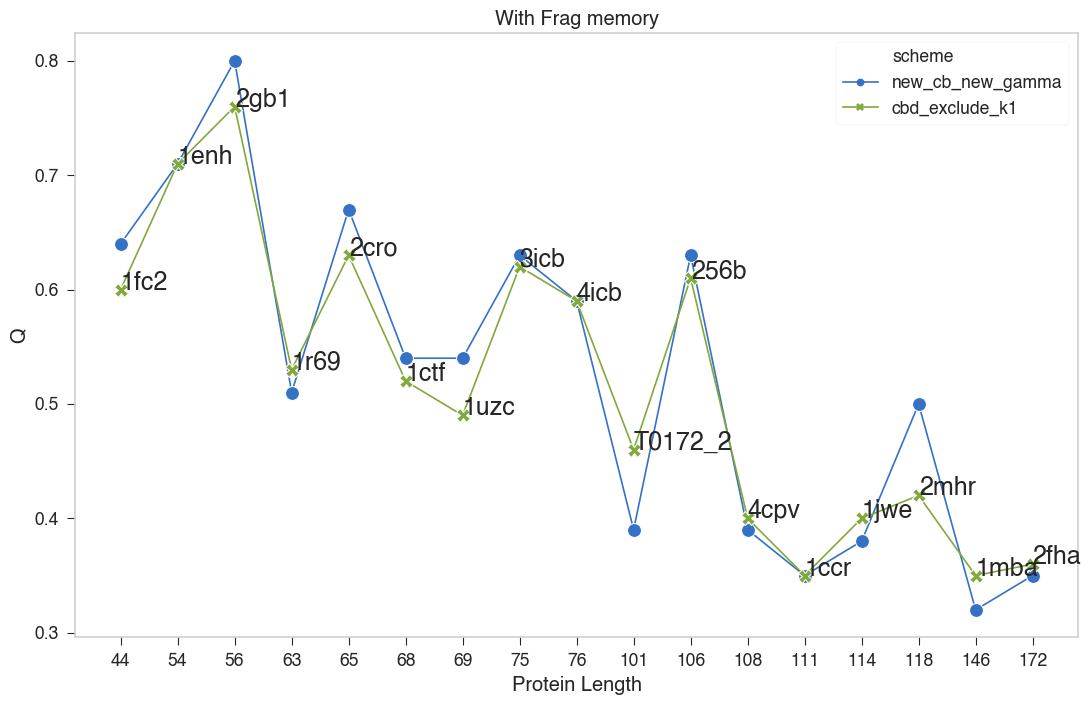

In [27]:
# length_info = pd.DataFrame(info_, columns=["Protein", "Length"])
# length_info["Protein_and_Length"] = length_info["Protein"] + "_" + length_info["Length"].astype(str)
# length_info.to_csv("/Users/weilu/Research/data/openMM/length_info_mar02.csv", index=0)
length_info = pd.read_csv("/Users/weilu/Research/data/openMM/length_info_mar02.csv")
length_order = length_info.sort_values("Length")["Length"].to_list()

pdb_order = length_info.sort_values("Length")["Protein"].to_list()
pdb_length_order = length_info.sort_values("Length")["Protein_and_Length"].to_list()
data = data.merge(length_info, on="Protein")
data.Protein = pd.Categorical(data.Protein, 
                      categories=pdb_order)
data.Protein_and_Length = pd.Categorical(data.Protein_and_Length, 
                      categories=pdb_length_order)

plt.rcParams['figure.figsize'] = 0.8*np.array([16.18033, 10])    #golden ratio
y = "Q"
d = data

t = d.groupby(["Protein", "subMode"])[y].idxmax().reset_index()
max_Q_data = d.iloc[t[y].to_list()].reset_index(drop=True)
sub_data = max_Q_data.query("subMode == 11 or subMode == 7")


ax = sns.lineplot(x="Protein_and_Length", y="Q", markers=True, ms=10, style="scheme", hue="scheme", data=sub_data, dashes=False)
plt.xticks(pdb_length_order, length_order)
plt.xlabel("Protein Length")

for i, line in sub_data.query("subMode == 11").reset_index(drop=True).iterrows():
#     print(i, line)
#     print(line["Protein"], )
    plt.annotate(line["Protein"], (i, line["Q"]), fontsize=18)
plt.title("With Frag memory")

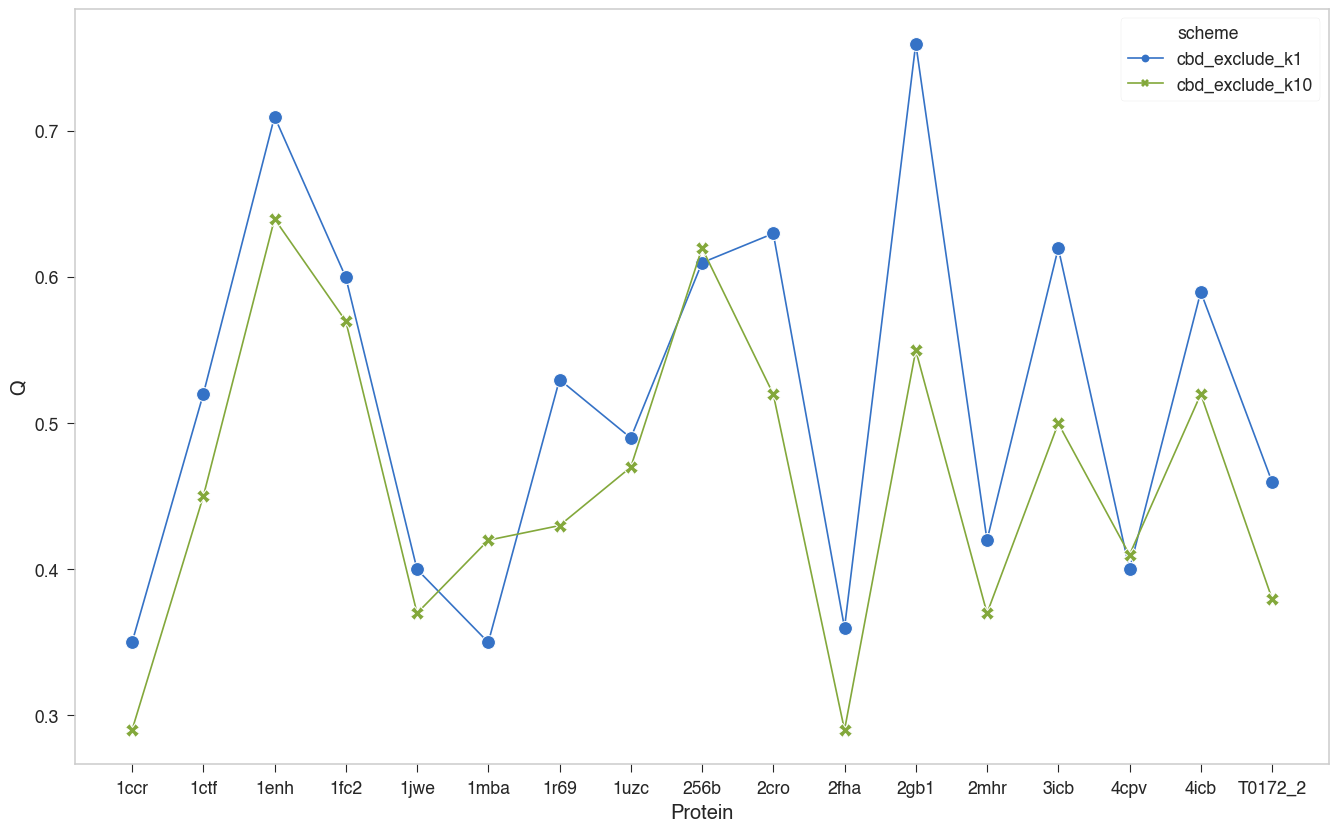

In [6]:
y = "Q"
d = data
t = d.groupby(["Protein", "subMode"])[y].idxmax().reset_index()
max_Q_data = d.iloc[t[y].to_list()].reset_index(drop=True)
sub_data = max_Q_data
# new_order = max_Q_data.query("Folder == 'iteration_3'").sort_values("Q")["Protein"].unique().to_list()
# sub_data = max_Q_data.sort_values("Q").reset_index(drop=True).reset_index()
# sub_data.Protein = sub_data.Protein.astype(str)
# sub_data.Protein = pd.Categorical(sub_data.Protein, 
#                       categories=new_order)
ax = sns.lineplot(x="Protein", y="Q", markers=True, ms=10, style="scheme", hue="scheme", data=sub_data, dashes=False)

In [9]:

data = pd.read_csv("/Users/weilu/Research/data/openMM/casp13_targets_side_chain_run1_5_02-22.csv", index_col=0)

scheme_dic = {"2":"new_cb_without_frag", "3":"old_cb_without_frag", 
             "4":"new_cb_with_ca_frag", "5":"old_cb_with_ca_frag", "6":"old_cb_my_gamma"}
data["scheme"] = data["subMode"].astype(str).apply(lambda x: scheme_dic[x])

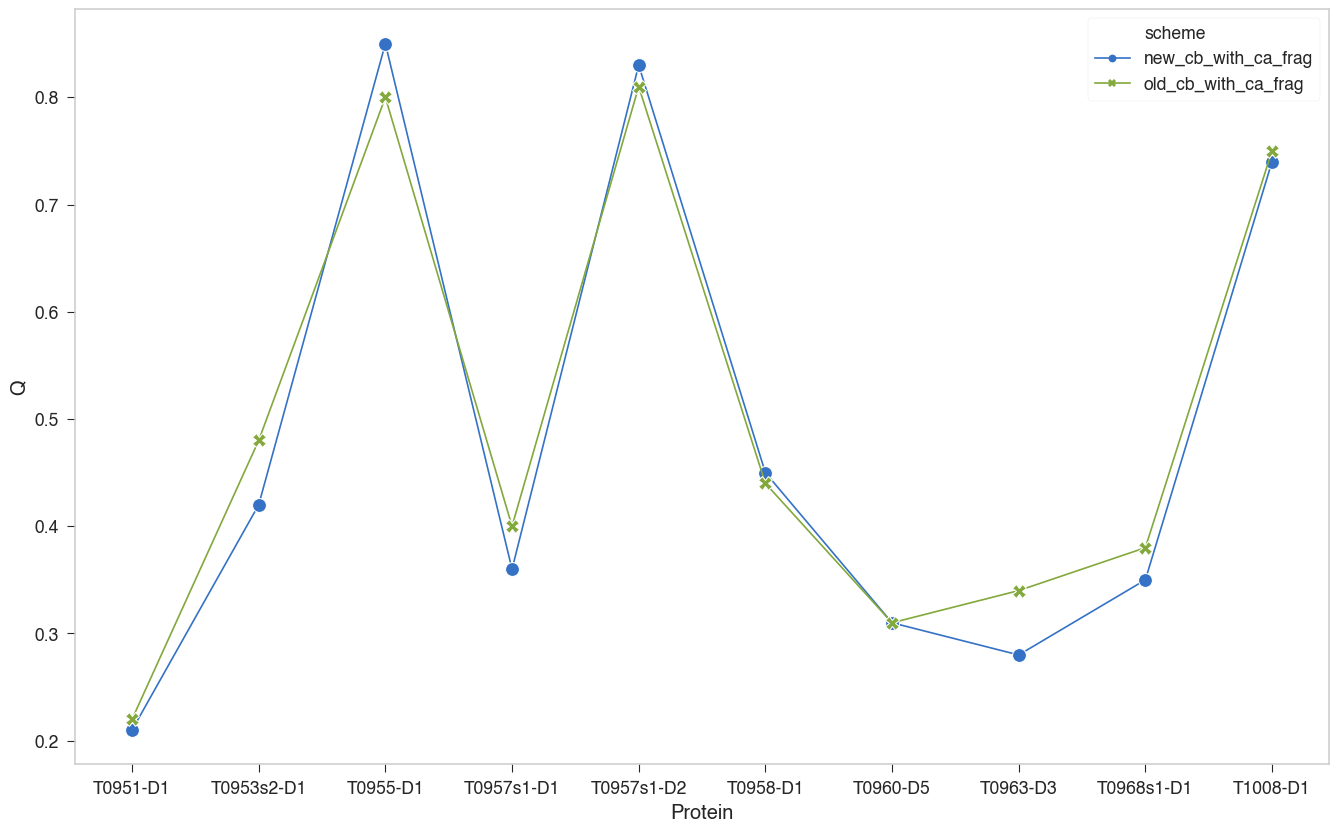

In [10]:
y = "Q"
d = data
t = d.groupby(["Protein", "subMode"])[y].idxmax().reset_index()
max_Q_data = d.iloc[t[y].to_list()].reset_index(drop=True)
sub_data = max_Q_data
# new_order = max_Q_data.query("Folder == 'iteration_3'").sort_values("Q")["Protein"].unique().to_list()
# sub_data = max_Q_data.sort_values("Q").reset_index(drop=True).reset_index()
# sub_data.Protein = sub_data.Protein.astype(str)
# sub_data.Protein = pd.Categorical(sub_data.Protein, 
#                       categories=new_order)
ax = sns.lineplot(x="Protein", y="Q", markers=True, ms=10, style="scheme", hue="scheme", data=sub_data, dashes=False)

In [6]:
pdb_list = ['1r69', '3icb', '256b', '4cpv', '2mhr', '1mba', '2fha', '1fc2', '1enh', '2gb1', '2cro', '1ctf', '4icb']
pdb_list += ["1uzc", "1ccr", "1jwe", "T0172_2"]

In [7]:
simulationType = "compare_side_chain_with_and_without"
run_n = 10
folder_list = ["side_chain_run1"]
sub_mode_list = [4, 5, 6, 7]
all_data = []

for folder in folder_list:
    for pdb in pdb_list:
        for i in range(run_n):
            for subMode in sub_mode_list:
                pre = f"/Users/weilu/Research/server/feb_2020/{simulationType}/{folder}/{pdb}/{subMode}_{i}"
                info_file = "info.dat"
                location = f"{pre}/{info_file}"
                try:
                    tmp = pd.read_csv(location, sep="\s+")
                    tmp = tmp.assign(Run=i, Protein=pdb, Folder=folder, subMode=subMode)
                    all_data.append(tmp)
                except:
                    print(pdb, i, folder, subMode)
                    pass
data = pd.concat(all_data)
today = datetime.today().strftime('%m-%d')
outFile = f"/Users/weilu/Research/data/openMM/{simulationType}_{folder}_{subMode}_{today}.csv"
data.reset_index(drop=True).to_csv(outFile)
print(outFile)

1mba 5 side_chain_run1 5
/Users/weilu/Research/data/openMM/compare_side_chain_with_and_without_side_chain_run1_7_02-25.csv


In [9]:

data = pd.read_csv("/Users/weilu/Research/data/openMM/compare_side_chain_with_and_without_side_chain_run1_7_02-25.csv", index_col=0)

scheme_dic = {"2":"new_cb_without_frag", "3":"old_cb_without_frag", 
             "4":"new_cb_with_ca_frag", "5":"old_cb_with_ca_frag", "6":"old_cb_my_gamma",
            "7":"new_cb_new_gamma"}
data["scheme"] = data["subMode"].astype(str).apply(lambda x: scheme_dic[x])

In [8]:
info_ = []
for pdb in pdb_list:
    fastaFile = f"/Users/weilu/Research/server/feb_2020/compare_side_chain_with_and_without/setups/{pdb}/{pdb}.fasta"
    Length = len(getSeqFromFasta(fastaFile))
    info_.append([pdb, Length])

In [12]:
length_info = pd.DataFrame(info_, columns=["Protein", "Length"])
length_info["Protein_and_Length"] = length_info["Protein"] + "_" + length_info["Length"].astype(str)
length_order = length_info.sort_values("Length")["Length"].to_list()

pdb_order = length_info.sort_values("Length")["Protein"].to_list()
pdb_length_order = length_info.sort_values("Length")["Protein_and_Length"].to_list()
data = data.merge(length_info, on="Protein")
data.Protein = pd.Categorical(data.Protein, 
                      categories=pdb_order)
data.Protein_and_Length = pd.Categorical(data.Protein_and_Length, 
                      categories=pdb_length_order)

plt.rcParams['figure.figsize'] = 0.8*np.array([16.18033, 10])    #golden ratio
y = "Q"
d = data

t = d.groupby(["Protein", "subMode"])[y].idxmax().reset_index()
max_Q_data = d.iloc[t[y].to_list()].reset_index(drop=True)
sub_data = max_Q_data


Text(0.5, 1.0, 'With Frag memory')

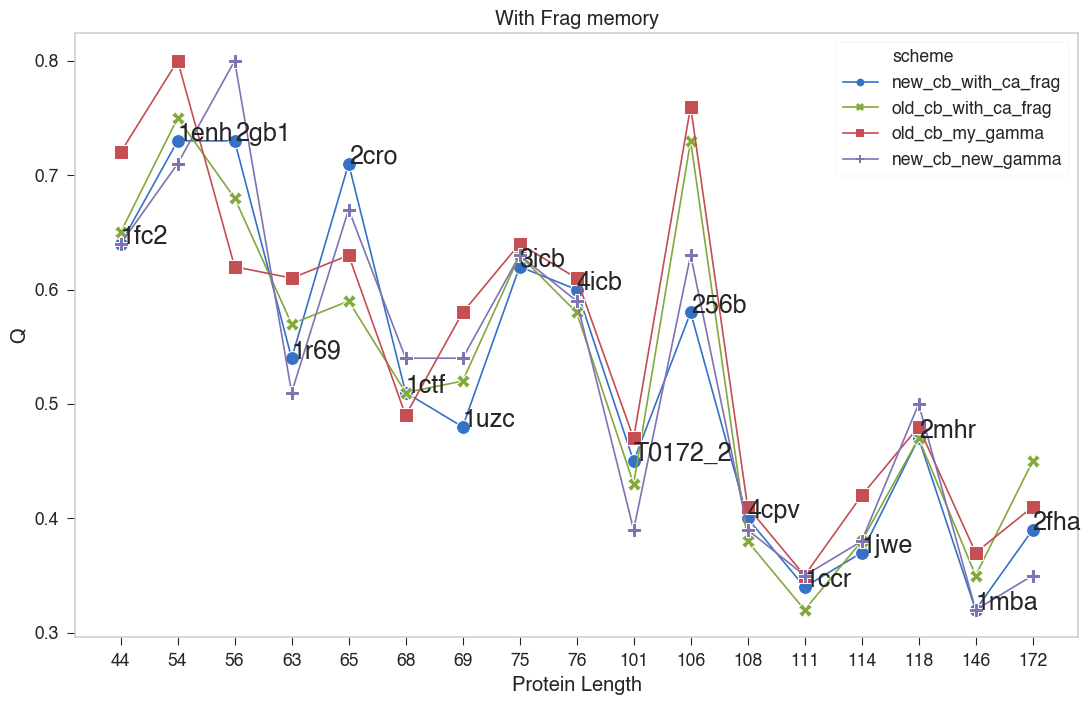

In [13]:
length_info = pd.DataFrame(info_, columns=["Protein", "Length"])
length_info["Protein_and_Length"] = length_info["Protein"] + "_" + length_info["Length"].astype(str)
length_order = length_info.sort_values("Length")["Length"].to_list()

pdb_order = length_info.sort_values("Length")["Protein"].to_list()
pdb_length_order = length_info.sort_values("Length")["Protein_and_Length"].to_list()
data = data.merge(length_info, on="Protein")
data.Protein = pd.Categorical(data.Protein, 
                      categories=pdb_order)
data.Protein_and_Length = pd.Categorical(data.Protein_and_Length, 
                      categories=pdb_length_order)

plt.rcParams['figure.figsize'] = 0.8*np.array([16.18033, 10])    #golden ratio
y = "Q"
d = data

t = d.groupby(["Protein", "subMode"])[y].idxmax().reset_index()
max_Q_data = d.iloc[t[y].to_list()].reset_index(drop=True)
sub_data = max_Q_data


ax = sns.lineplot(x="Protein_and_Length", y="Q", markers=True, ms=10, style="scheme", hue="scheme", data=sub_data, dashes=False)
plt.xticks(pdb_length_order, length_order)
plt.xlabel("Protein Length")

for i, line in sub_data.query("subMode == 4").reset_index(drop=True).iterrows():
#     print(i, line)
#     print(line["Protein"], )
    plt.annotate(line["Protein"], (i, line["Q"]), fontsize=18)
plt.title("With Frag memory")

Text(0.5, 1.0, 'With Frag memory')

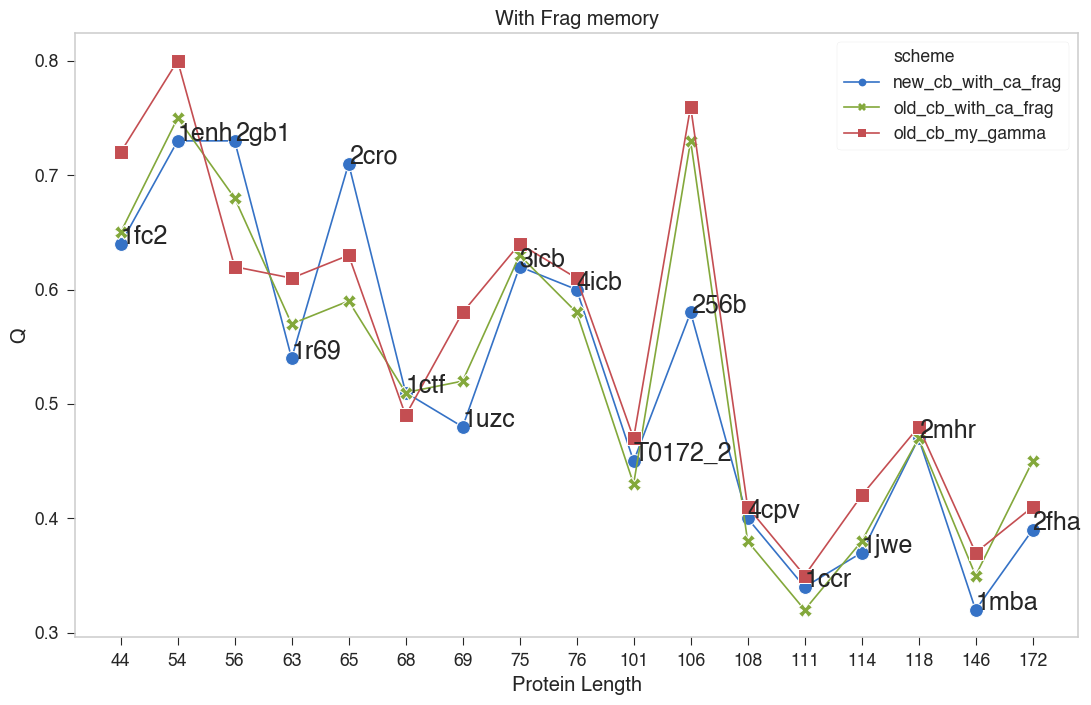

In [178]:
ax = sns.lineplot(x="Protein_and_Length", y="Q", markers=True, ms=10, style="scheme", hue="scheme", data=sub_data, dashes=False)
plt.xticks(pdb_length_order, length_order)
plt.xlabel("Protein Length")

for i, line in sub_data.query("subMode == 4").reset_index(drop=True).iterrows():
#     print(i, line)
#     print(line["Protein"], )
    plt.annotate(line["Protein"], (i, line["Q"]), fontsize=18)
plt.title("With Frag memory")

Text(0.5, 1.0, 'With Frag memory')

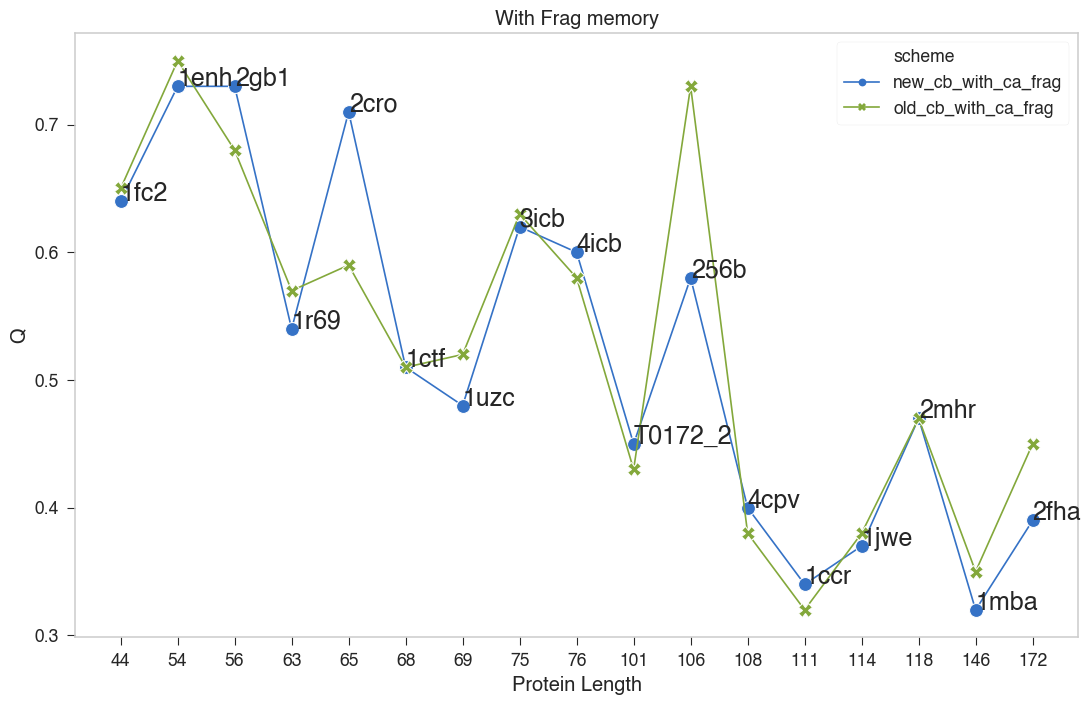

In [170]:
ax = sns.lineplot(x="Protein_and_Length", y="Q", markers=True, ms=10, style="scheme", hue="scheme", data=sub_data, dashes=False)
plt.xticks(pdb_length_order, length_order)
plt.xlabel("Protein Length")

for i, line in sub_data.query("subMode == 4").reset_index(drop=True).iterrows():
#     print(i, line)
#     print(line["Protein"], )
    plt.annotate(line["Protein"], (i, line["Q"]), fontsize=18)
plt.title("With Frag memory")

Text(0.5, 1.0, 'With Frag memory')

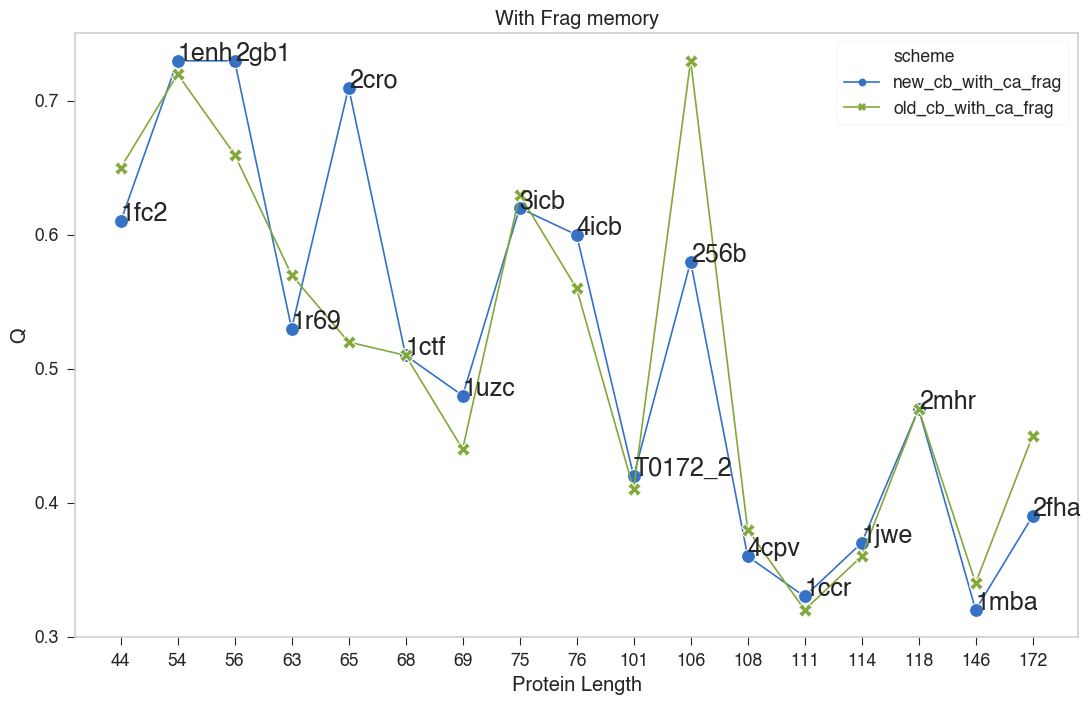

In [164]:
ax = sns.lineplot(x="Protein_and_Length", y="Q", markers=True, ms=10, style="scheme", hue="scheme", data=sub_data, dashes=False)
plt.xticks(pdb_length_order, length_order)
plt.xlabel("Protein Length")

for i, line in sub_data.query("subMode == 4").reset_index(drop=True).iterrows():
#     print(i, line)
#     print(line["Protein"], )
    plt.annotate(line["Protein"], (i, line["Q"]), fontsize=18)
plt.title("With Frag memory")

In [25]:
simulationType = "compare_side_chain_with_and_without"
run_n = 10
folder_list = ["side_chain_run1"]
sub_mode_list = [2, 3]
all_data = []

for folder in folder_list:
    for pdb in pdb_list:
        for i in range(run_n):
            for subMode in sub_mode_list:
                pre = f"/Users/weilu/Research/server/feb_2020/{simulationType}/{folder}/{pdb}/{subMode}_{i}"
                info_file = "info.dat"
                location = f"{pre}/{info_file}"
                try:
                    tmp = pd.read_csv(location, sep="\s+")
                    tmp = tmp.assign(Run=i, Protein=pdb, Folder=folder, subMode=subMode)
                    all_data.append(tmp)
                except:
                    print(pdb, i, folder)
                    pass
data = pd.concat(all_data)
today = datetime.today().strftime('%m-%d')
outFile = f"/Users/weilu/Research/data/openMM/{simulationType}_{folder}_{subMode}_{today}.csv"
data.reset_index(drop=True).to_csv(outFile)
print(outFile)

/Users/weilu/Research/data/openMM/compare_side_chain_with_and_without_side_chain_run1_3_02-18.csv


In [102]:

data = pd.read_csv("/Users/weilu/Research/data/openMM/compare_side_chain_with_and_without_side_chain_run1_3_02-18.csv", index_col=0)

scheme_dic = {"2":"new_cb_without_frag", "3":"old_cb_without_frag"}
data["scheme"] = data["subMode"].astype(str).apply(lambda x: scheme_dic[x])

In [72]:
info_ = []
for pdb in pdb_list:
    fastaFile = f"/Users/weilu/Research/server/feb_2020/compare_side_chain_with_and_without/setups/{pdb}/{pdb}.fasta"
    Length = len(getSeqFromFasta(fastaFile))
    info_.append([pdb, Length])

In [96]:
length_info = pd.DataFrame(info_, columns=["Protein", "Length"])
length_info["Protein_and_Length"] = length_info["Protein"] + "_" + length_info["Length"].astype(str)
length_order = length_info.sort_values("Length")["Length"].to_list()

In [104]:
pdb_order = length_info.sort_values("Length")["Protein"].to_list()
pdb_length_order = length_info.sort_values("Length")["Protein_and_Length"].to_list()
data = data.merge(length_info, on="Protein")
data.Protein = pd.Categorical(data.Protein, 
                      categories=pdb_order)
data.Protein_and_Length = pd.Categorical(data.Protein_and_Length, 
                      categories=pdb_length_order)

In [106]:
plt.rcParams['figure.figsize'] = 0.8*np.array([16.18033, 10])    #golden ratio
y = "Q"
d = data

t = d.groupby(["Protein", "subMode"])[y].idxmax().reset_index()
max_Q_data = d.iloc[t[y].to_list()].reset_index(drop=True)
sub_data = max_Q_data


In [123]:
text_ = []
for pdb, length in zip(pdb_order, length_order):
    if pdb == "T0172_2":
        pdb = "T0172B"
    text_.append(f"{pdb}\n{length}")

Text(0.5, 1.0, 'Without Frag memory')

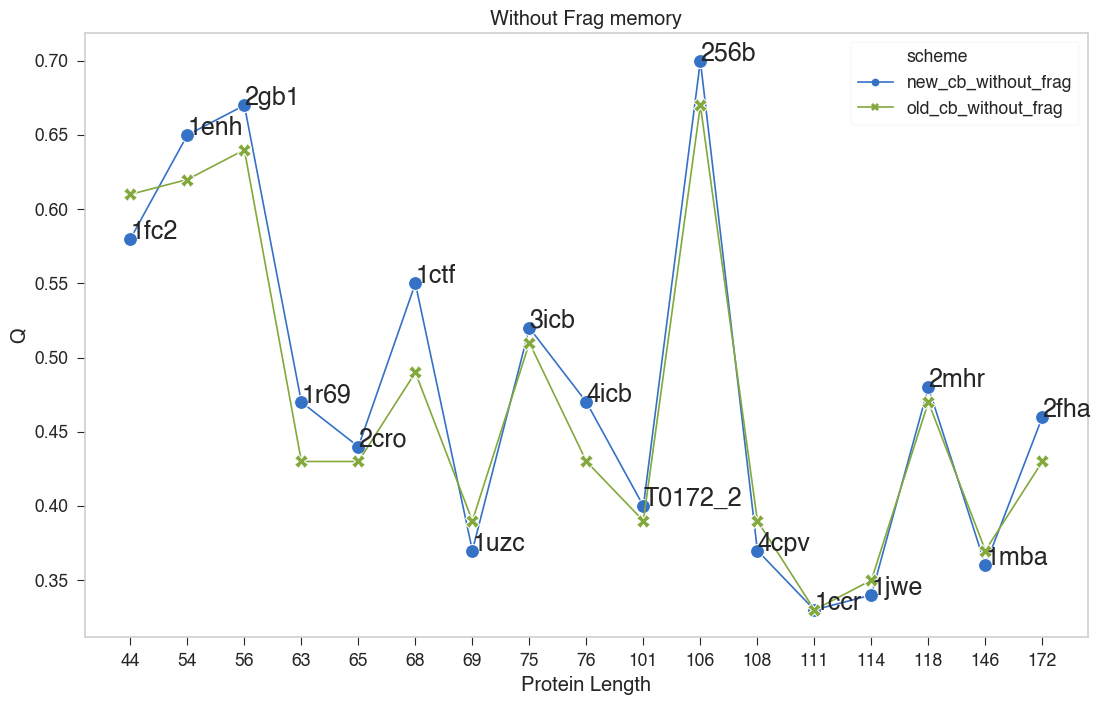

In [140]:
ax = sns.lineplot(x="Protein_and_Length", y="Q", markers=True, ms=10, style="scheme", hue="scheme", data=sub_data, dashes=False)
plt.xticks(pdb_length_order, length_order)
plt.xlabel("Protein Length")

for i, line in sub_data.query("subMode == 2").reset_index(drop=True).iterrows():
#     print(i, line)
#     print(line["Protein"], )
    plt.annotate(line["Protein"], (i, line["Q"]), fontsize=18)
plt.title("Without Frag memory")

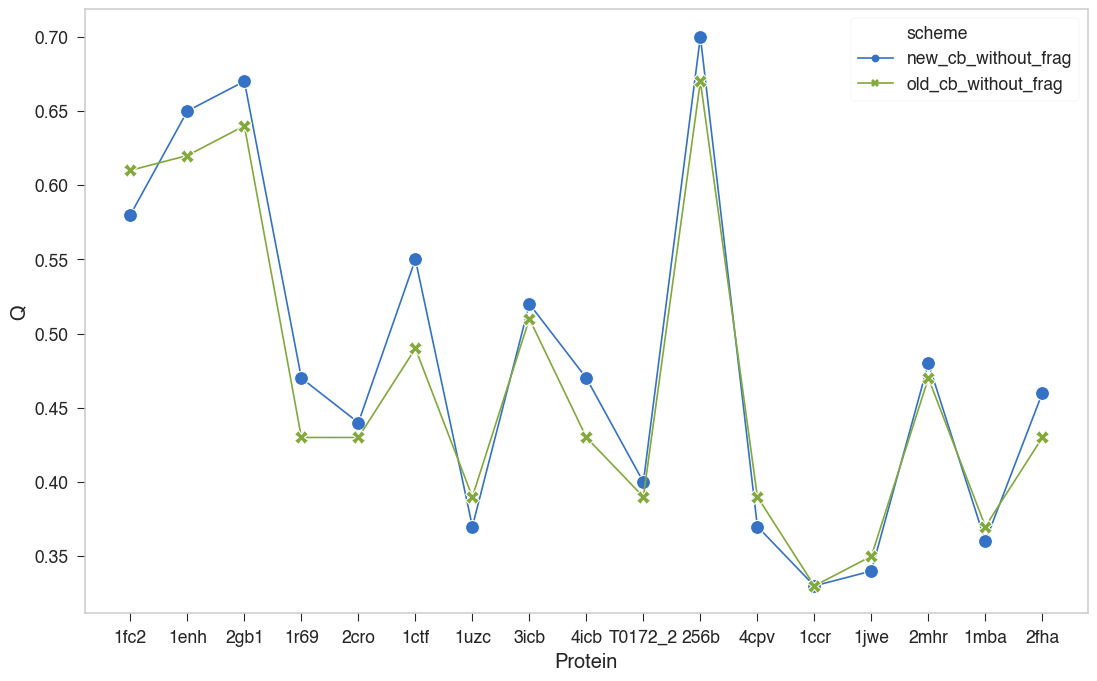

In [81]:
plt.rcParams['figure.figsize'] = 0.8*np.array([16.18033, 10])    #golden ratio
y = "Q"
d = data
t = d.groupby(["Protein", "subMode"])[y].idxmax().reset_index()
max_Q_data = d.iloc[t[y].to_list()].reset_index(drop=True)
sub_data = max_Q_data
ax = sns.lineplot(x="Protein", y="Q", markers=True, ms=10, style="scheme", hue="scheme", data=sub_data, dashes=False)

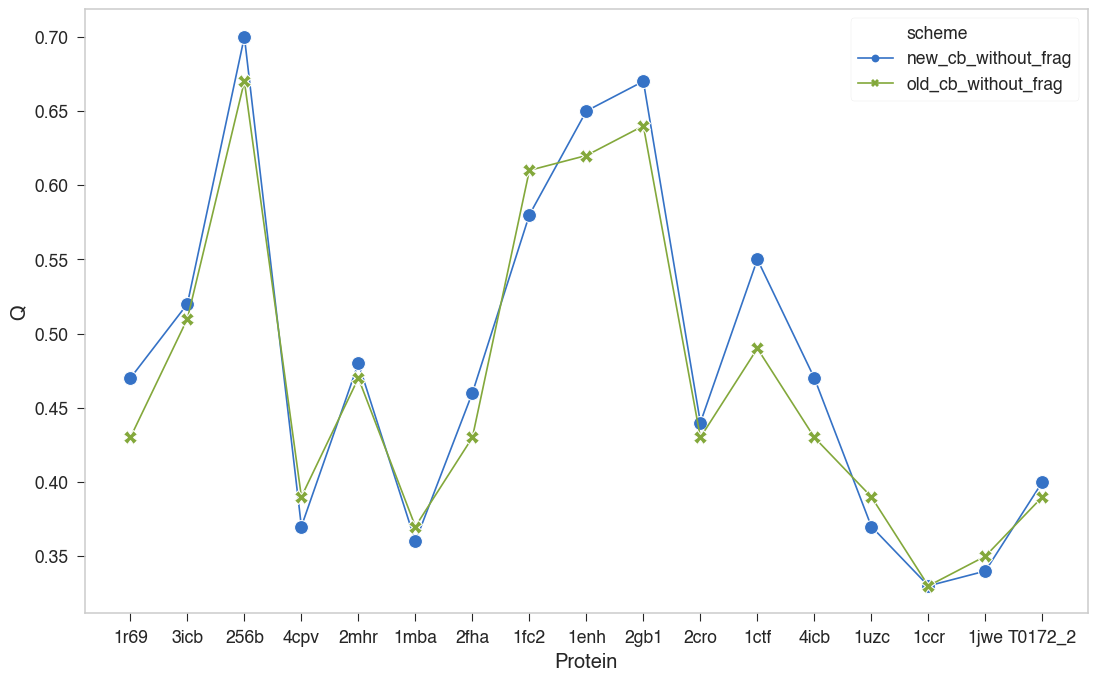

In [67]:
plt.rcParams['figure.figsize'] = 0.8*np.array([16.18033, 10])    #golden ratio
y = "Q"
d = data
t = d.groupby(["Protein", "subMode"])[y].idxmax().reset_index()
max_Q_data = d.iloc[t[y].to_list()].reset_index(drop=True)
sub_data = max_Q_data
ax = sns.lineplot(x="Protein", y="Q", markers=True, ms=10, style="scheme", hue="scheme", data=sub_data, dashes=False)

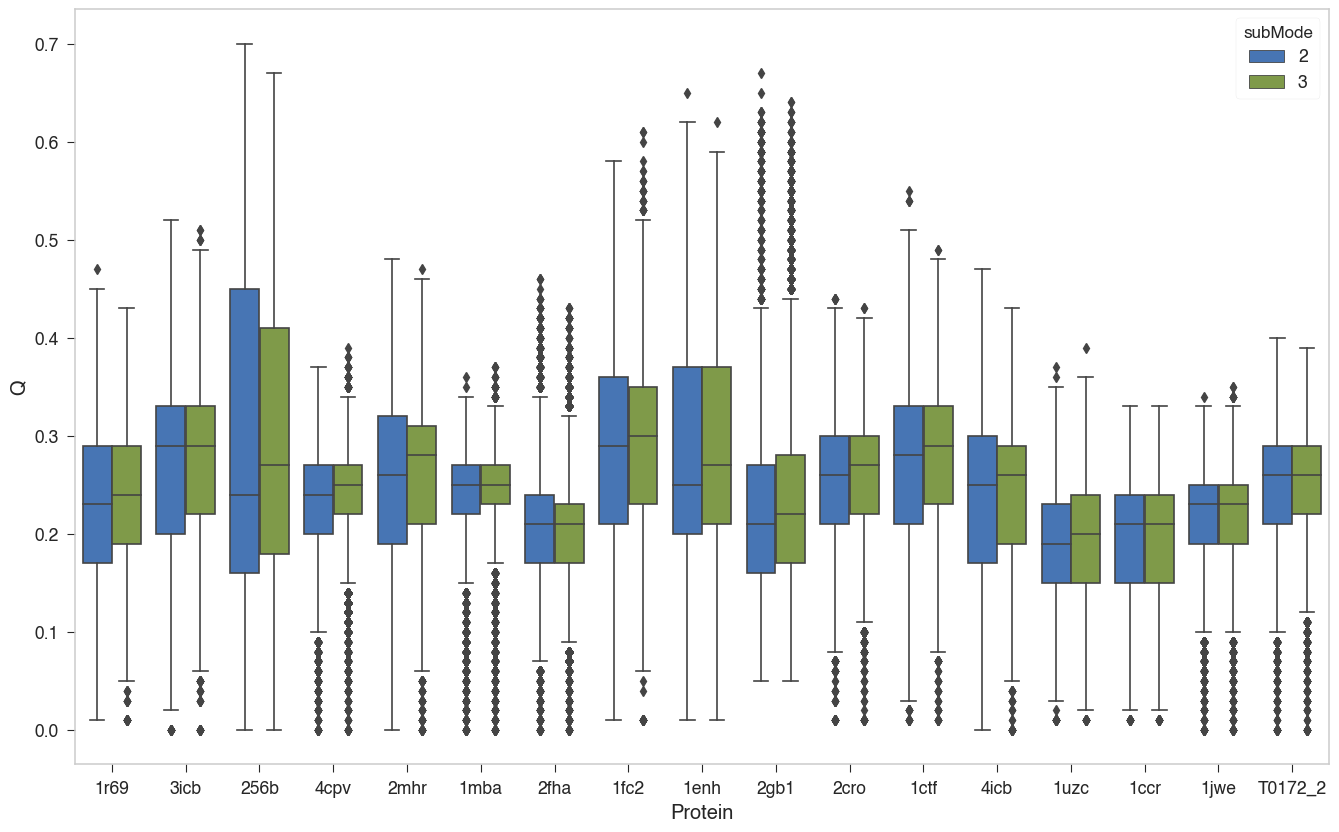

In [54]:
sns.boxplot("Protein", "Q", hue="subMode", data=data)

In [14]:
simulationType = "compare_side_chain_with_and_without"
run_n = 10
folder_list = ["side_chain_run1"]
sub_mode_list = [0, 1]
all_data = []

for folder in folder_list:
    for pdb in pdb_list:
        for i in range(run_n):
            for subMode in sub_mode_list:
                pre = f"/Users/weilu/Research/server/feb_2020/{simulationType}/{folder}/{pdb}/{subMode}_{i}"
                info_file = "info.dat"
                location = f"{pre}/{info_file}"
                try:
                    tmp = pd.read_csv(location, sep="\s+")
                    tmp = tmp.assign(Run=i, Protein=pdb, Folder=folder, subMode=subMode)
                    all_data.append(tmp)
                except:
                    print(pdb, i, folder)
                    pass
data = pd.concat(all_data)
today = datetime.today().strftime('%m-%d')
outFile = f"/Users/weilu/Research/data/openMM/{simulationType}_{folder}_{today}.csv"
data.reset_index(drop=True).to_csv(outFile)
print(outFile)

3icb 1 side_chain_run1
256b 1 side_chain_run1
1mba 1 side_chain_run1
2fha 1 side_chain_run1
/Users/weilu/Research/data/openMM/compare_side_chain_with_and_without_side_chain_run1_02-17.csv


In [15]:
# data = pd.read_csv("/Users/weilu/Research/data/openMM/mass_iterative_run_iteration_0_02-07.csv", index_col=0)
# data = pd.read_csv("/Users/weilu/Research/data/openMM/mass_iterative_run_iteration_1_02-10.csv", index_col=0)
# data = pd.read_csv("/Users/weilu/Research/data/openMM/mass_iterative_run_iteration_2_02-11.csv", index_col=0)
data = pd.read_csv("/Users/weilu/Research/data/openMM/compare_side_chain_with_and_without_side_chain_run1_02-17.csv", index_col=0)

sub_pdb_list = pdb_list
data.Protein = pd.Categorical(data.Protein, 
                      categories=sub_pdb_list)

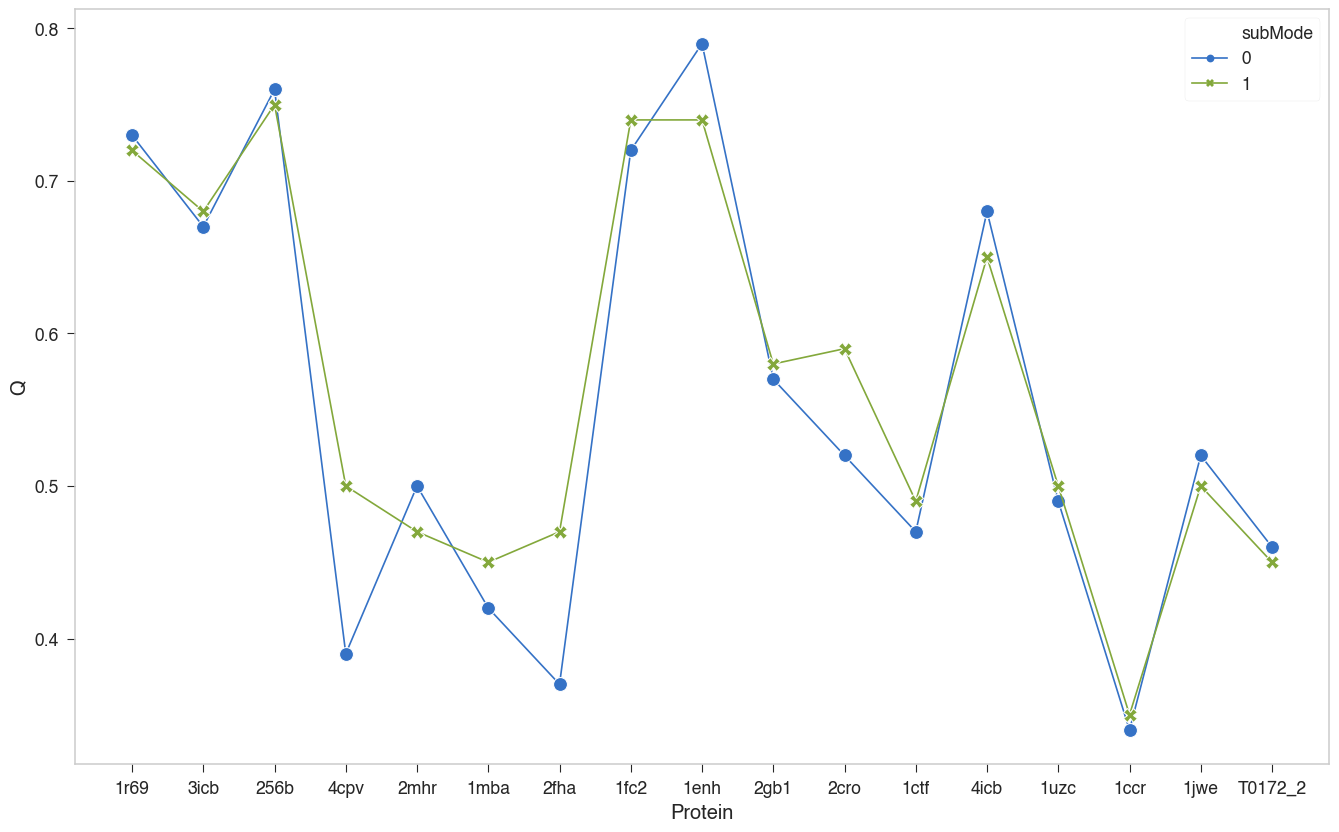

In [21]:
y = "Q"
d = data
t = d.groupby(["Protein", "subMode"])[y].idxmax().reset_index()
max_Q_data = d.iloc[t[y].to_list()].reset_index(drop=True)
sub_data = max_Q_data
# new_order = max_Q_data.query("Folder == 'iteration_3'").sort_values("Q")["Protein"].unique().to_list()
# sub_data = max_Q_data.sort_values("Q").reset_index(drop=True).reset_index()
# sub_data.Protein = sub_data.Protein.astype(str)
# sub_data.Protein = pd.Categorical(sub_data.Protein, 
#                       categories=new_order)
ax = sns.lineplot(x="Protein", y="Q", markers=True, ms=10, style="subMode", hue="subMode", data=sub_data, dashes=False)

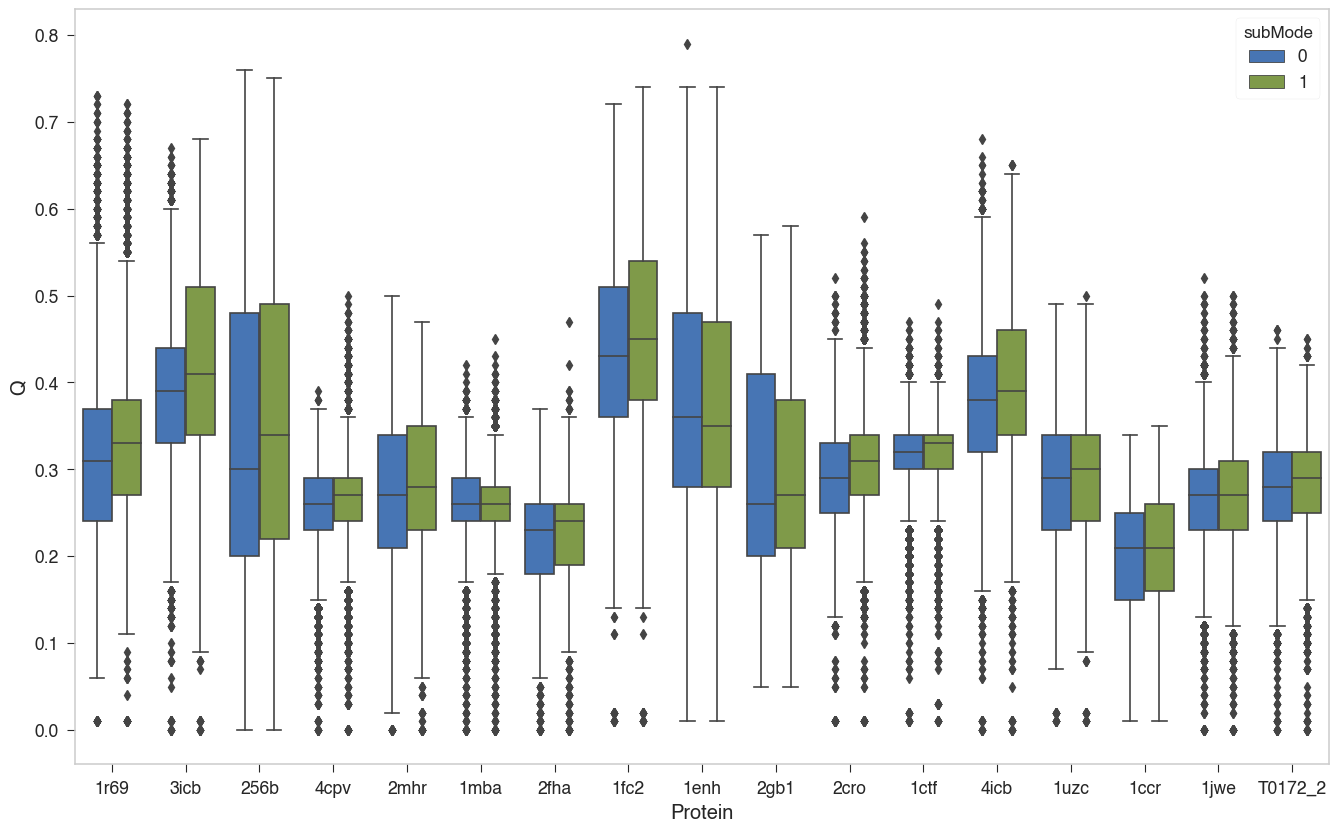

In [16]:
sns.boxplot("Protein", "Q", hue="subMode", data=data)

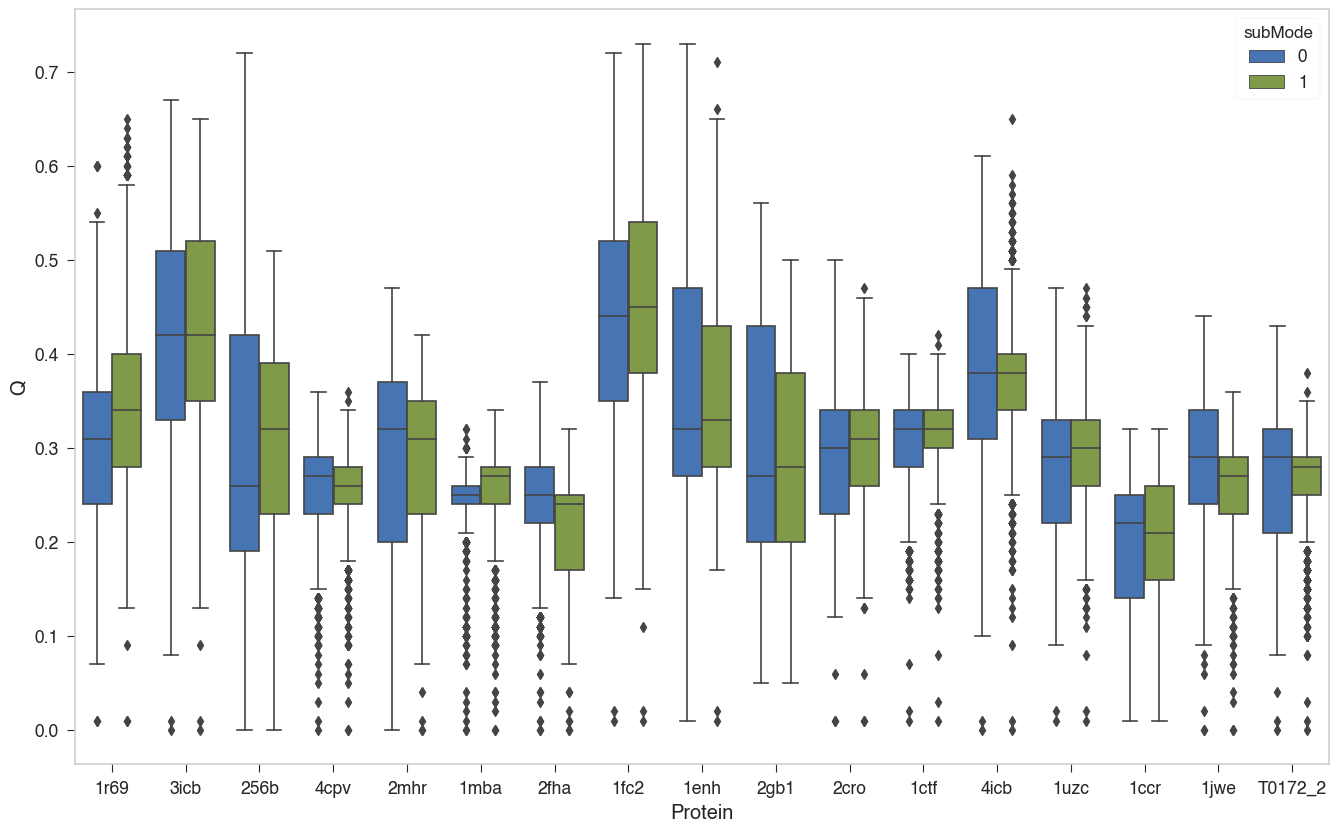

In [12]:
sns.boxplot("Protein", "Q", hue="subMode", data=data)

In [ ]:
a = np.zeros((100,100))
a[:50,:50] = 1
# a[50:,50:] = 2
plt.imshow(a, origin=0, extent=[0,1,0,1])

In [ ]:
a = np.zeros((100,100))
a[:50,:50] = 1
a[50:,50:] = 2
plt.imshow(a, origin=0, extent=[0,1,0,1])